# Transformada de Fourier de Funciones Hidrogénicas

Darío Mitnik


In [68]:
import time
from sympy import *
init_printing()

#Definimos todos los parametros que vamos a usar, darle informacion extra 
#como que es real, o positivo, ayuda a la hora de integral
r=Symbol('r',positive=True)
theta=Symbol('theta',positive=True)
z=Symbol('z',integrer=True,positive=True)
t=Symbol('t',positive=True)
k=Symbol('k',positive=True)


In [69]:
# Definición de las funciones de onda Hidrogénicas
R1s=2*z**(3./2)*exp(-z*r)
R2s=z**(3./2)*exp(-z*r/2)/sqrt(8)*(2-z*r)
R2p=2*z**(5./2)*exp(-z*r/2)/sqrt(24)*r
V=-z/r

La integral que queremos resolver es

\begin{equation}  
\tilde{\phi}_{n_i,l_i,m_i}(\vec{k})=\int Y_{l_i}^{m_i}(\hat{r}) \, R_{n_il_i}(r) 
\, e^{-i\vec{r}\vec{k}} d\vec{r} \, 
\end{equation}

En la exponencial aparece el ángulo entre  $\vec{k}$  y $\vec{r}$  (no es el mismo que el ángulo entre $\vec{z}$  y $\vec{r}$)


In [70]:
# Ejemplo:  Transformada de R_1s (No es la mejor forma!)

tic=time.clock()
#T_1s_mal=integrate(2*pi/sqrt(4*pi)*R1s*r**2*sin(theta)*exp(-I*k*r*cos(theta)), (theta,0,pi),(r,0,oo))
T_1s_mal=integrate(exp(-I*k*r*cos(theta)), (theta,0,pi),(r,0,oo))

time.clock()-tic,factor(simplify(T_1s_mal))


KeyboardInterrupt: 

\begin{equation}
\frac{8 \sqrt(\pi) z^{2.5}}{(k^2 + z^2)^2}
\end{equation}

In [71]:
# Forma correcta: 
# Expandiendo la onda plana en Armónicos Esféricos


Usamos la expansión de la onda plana:

\begin{equation}
e^{i\vec{k}\vec{r}} = \sum_l (2l+1) \, i^l \, j_l(kr) \, P_l(\hat{k}\cdot\hat{r})  \, , 
\end{equation} 
 
en donde $j_{l}(rk)$ son las funciones esféricas de Bessel. 
Usamos el teorema de adición de los armónicos esféricos: 
    
\begin{equation}
P_l(\hat{k}\cdot\hat{r})= 
\frac{4\pi}{2l+1} \sum_m {Y_l^m}^*(\hat{r}) Y_l^m(\hat{k}) \, .
\end{equation}

La transformada de Fourier resulta


\begin{equation}
\tilde{\phi}(\vec{k}) = 4\pi i^{l} \sum_l  \sum_m 
Y_l^m(\hat{k}) \int_{\Omega} {Y_l^m}^*(\hat{r}) Y_{l_i}^{m_i}(\hat{r}) \, d\Omega 
\int_{\infty} R_{n_il_i}(r) \, j_l(kr) \, r^2 \, dr 
\end{equation}

La integral angular es  $\delta_{l_i,l}\,\delta_{m_i,m}$  que usamos para eliminar las sumatorias. 

Finalmente:

\begin{equation} 
\tilde{\phi}(\vec{k}) = 4\pi i^{l_1} Y_{l_i}^{m_i}(\hat{k}) 
\int_{\infty} R_{n_il_i}(r) \, j_{l_1}(kr) \, r^{2} \, dr  
\end{equation}

Todo esto resulta operacionalmente ventajoso por dos motivos: 
* Es una unica integral en una sola variable. 
* Nos podemos despreocupar de la parte angular.
    

Notar que la transformada de Fourier tiene la **misma simetría** que la 
función original.

    

In [72]:
#Vamos a definir las j que usamos
j0=sin(k*r)/(k*r)
j1=sin(k*r)/(k*r)**2-cos(k*r)/(k*r)

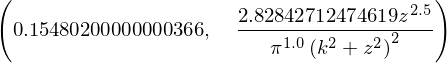

In [99]:
#print(2**(3/2))
tic=time.clock()
T_1s_bien=integrate(4*pi/sqrt(4*pi)*R1s*r**2*j0/(2*pi)**(3/2),(r,0,oo))
toc=time.clock()
#toc-tic,simplify(4*pi/sqrt(4*pi)*T_1s_bien/(2*pi)**(3/2))
toc-tic,simplify(T_1s_bien)
#T_1s_bien=4*pi/sqrt(4*pi)*T_1s_bien/(2*pi)**(3/2)
#print(T_1s_bien)

\begin{equation}
\frac{8 \sqrt(\pi) z^{2.5}}{(k^2 + z^2)^2}
\end{equation}

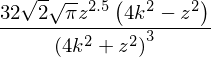

In [77]:
# Transformada de la función 2s

T_2s=integrate(R2s*r**2*j0,(r,0,oo))
simplify(4*pi/sqrt(4*pi)*T_2s)

\begin{equation}
\frac{32 \sqrt{2  \pi z^5}    \, (4 k^2 - z^2)}{(4 k^2 + z^2)^3}
\end{equation}

## Ejercicios:

* Comprobar que la Transformada de la función 2s es correcta
* Repetir el ejercicio para la función 2p

# Para comprobar que la función es correcta uso

## $ \phi_{n,l}(\vec{r})=\int \cfrac{d\vec{k}}{(2\pi)^{3/2}} exp(+i\vec{k}\vec{r}) \phi_{n,l}(\vec{k}) $

## Para el 1s:

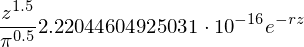

In [118]:
j0_inv=sin(-k*r)/(-k*r)
T_1s_inv=integrate(4*pi*T_1s_bien*k**2*j0_inv/(2*pi)**(3/2),(k,0,oo))


simplify(R1s*(4*pi)**(-1/2)) - simplify(T_1s_inv)

## Para el 2s:

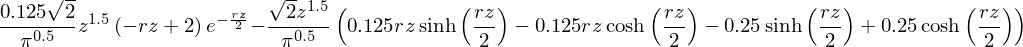

In [139]:
#Transformada del 2s

T_2s_bien=simplify(integrate(4*pi/sqrt(4*pi)*R2s*r**2*j0/(2*pi)**(3/2),(r,0,oo)))
T_2s_bien

#Antitransformo

T_2s_inv=simplify(integrate(4*pi*T_2s_bien*k**2*j0_inv/(2*pi)**(3/2),(k,0,oo)))
T_2s_inv

#expand(simplify(R2s*(4*pi)**(-1/2)) - simplify(T_2s_inv))
R2s*(4*pi)**(-1/2)-T_2s_inv

## La Ecuación de Schrodinger en el Espacio de los Momentos:

Transformando Fourier ambos lados de la ecuación de Schrödinger se obtiene:
    
\begin{equation} 
\left( E_n-\frac{k^2}{2} \right)\tilde{\phi}_{n,l}(\vec{k})= 
\frac{1}{(2\pi)^{3/2}} \int V(\vec{r}) \, \phi_{n,l}(\vec{r}) 
\, e^{-i\vec{k}\cdot\vec{r}} d\vec{r} 
\end{equation}

Vamos a comprobar que las funciones halladas previamente son efectivamente soluciones 
de esta nueva ecuación.

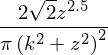

In [165]:
# Volvemos (por las dudas) a calcular la transformada de Fourier de 1s

rint=integrate(  R1s * j0 * r**2 ,(r,0,oo))
T1s = 1/(sqrt(2*pi))**3  * (4 * pi)/ sqrt(4*pi) * rint
simplify(T1s)

\begin{equation}
\frac{2 \sqrt{2 z^5}}{ \pi (k^2 + z^2)^2}
\end{equation}

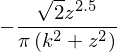

In [141]:
# Integramos el lado derecho 

rint=integrate(V *  R1s * j0 * r**2 ,(r,0,oo))
rhs = 1/(sqrt(2*pi))**3  * (4 * pi)/ sqrt(4*pi) * rint
simplify(rhs)

\begin{equation}
-\frac{\sqrt{2 z^5} }{ \pi (k^2 + z^2)}
\end{equation}

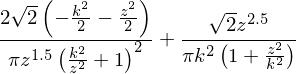

In [142]:
T1s*(-z*z/2 -k*k/2) - rhs

\begin{equation}
2 \sqrt{\frac{2}{z^3}} \frac{ (-\frac{k^2}{2} - \frac{z^2}{2}) }{\pi (\frac{k^2}{z^2} + 1)^2} + 
\frac{ \sqrt{2 z^5} }{\pi k^2 (1 + \frac{z^2}{k^2})}
\end{equation}

In [143]:
simplify (T1s*(-z*z/2 -k*k/2) - rhs)

## Ejercicios:

* Comprobar que la Transformada de la función 2s es solución de la ecuación correspondiente
* Repetir el ejercicio para la función 2p

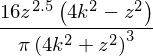

In [157]:
# Calculo la transformada de Fourier del 2s

rint=integrate(  R2s * j0 * r**2 ,(r,0,oo))
T2s = 1/(sqrt(2*pi))**3  * (4 * pi)/ sqrt(4*pi) * rint
simplify(T2s)

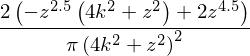

In [158]:
# Integramos el lado derecho 

rint=integrate(V *  R2s * j0 * r**2 ,(r,0,oo))
rhs = 1/(sqrt(2*pi))**3  * (4 * pi)/ sqrt(4*pi) * rint
simplify(rhs)


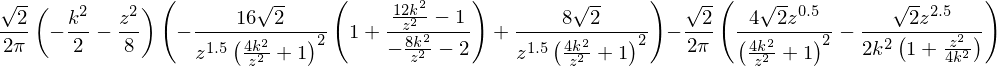

In [161]:
T2s*(-z*z/(2*2**2) -k*k/2) - rhs

In [163]:
simplify (T2s*(-z*z/(2*2**2) -k*k/2) - rhs)

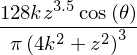

In [176]:
# Calculo la transformada de Fourier del 2p

rint=integrate(  R2p * j1 * r**2 ,(r,0,oo))
T2p = 1/(sqrt(2*pi))**3  * (4 * pi) * sqrt(3/pi)/2 * cos(theta) * rint
simplify(T2p)

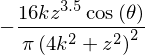

In [177]:
# Integramos el lado derecho 

rint=integrate(V *  R2p * j1 * r**2 ,(r,0,oo))
rhs = 1/(sqrt(2*pi))**3  * (4 * pi)* sqrt(3/pi)/2 * cos(theta) * rint
simplify(rhs)

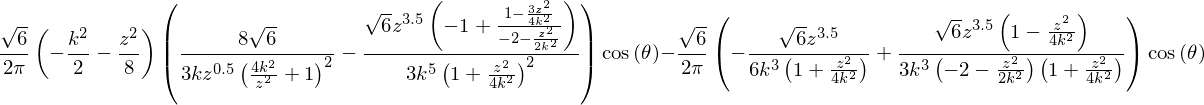

In [178]:
T2p*(-z*z/(2*2**2) -k*k/2) - rhs

In [179]:
simplify (T2p*(-z*z/(2*2**2) -k*k/2) - rhs)